# Titanic


## Imports and Configuration


In [1]:
# Data analysis and wrangling
import numpy as np, pandas as pd
# Access to system parameters
import sys
# Suppress warnings
from warnings import simplefilter
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# Default to system path
import os
os.sys.path.append("../")
# Path
from pathlib import Path
# Project configuration
from Config import SETTINGS
# Set Matplotlib defaults
%matplotlib inline
plt.style.use(["science", "ieee", "muted", "grid"])
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

# Mute warnings
simplefilter('ignore')

print('All libraries imported successfully.')


All libraries imported successfully.


## Data Preparation


In [2]:
train_df = pd.read_csv(Path(SETTINGS['ROOT_PATH']) / SETTINGS['TRAIN_PATH']) # Training data
test_df = pd.read_csv(Path(SETTINGS['ROOT_PATH']) / SETTINGS['TEST_PATH']) # Test data

train_df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Setting a random state for reproducibility


In [5]:
from Utils.utils import seed_everything

seed_everything(SETTINGS['RANDOM_STATE'])


Seed for reproducibility of results has been setted to: 42


## Explorative Data Analysis


In [25]:
from autoviz import data_cleaning_suggestions

data_cleaning_suggestions(train_df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


#### Dimensionality reduction with t-SNE and UMAP


## Applying Feature Engineering


### Data Cleaning


In [7]:
from Utils.utils import data_cleaning
# Drop useless columns
drop_list = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin'
]
fill_list = ['Age', 'Embarked', 'Fare']
anomaly_list = ['Fare']

categorical_features = ['Embarked', 'Sex']
numerical_features = ['Fare', 'Age', 'SibSp', 'Parch', 'Pclass']

target_col = 'Survived'

X, y, _, _ = data_cleaning(
    train_df, categorical_features, numerical_features, fill_list, drop_list, anomaly_list, target_col, mode='train')
X_test, _, _, _ = data_cleaning(test_df, categorical_features, numerical_features,
                                  fill_list, drop_list, anomaly_list, target_col, mode='test')


Data cleaning for train set has been completed successfully.
Data cleaning for test set has been completed successfully.


In [8]:
X.head()

Pclass  Sex_male  Sex_female       Age     SibSp     Parch      Fare  \
0  0.827377         1           0 -0.497793  0.432793 -0.473674 -0.785782   
1 -1.566107         0           1  0.715048  0.432793 -0.473674  3.222473   
2  0.827377         0           1 -0.194583 -0.474545 -0.473674 -0.743530   
3 -1.566107         0           1  0.487640  0.432793 -0.473674  2.084264   
4  0.827377         1           0  0.487640 -0.474545 -0.473674 -0.735705   

   Embarked_S  Embarked_C  Embarked_Q  
0           1           0           0  
1           0           1           0  
2           1           0           0  
3           1           0           0  
4           1           0           0

### Reducing the size of your data


In [9]:
from Utils.utils import reduce_mem_usage

X = reduce_mem_usage(X)
X_test = reduce_mem_usage(X_test)


Mem. usage decreased to  0.02 Mb (68.6% reduction)
Mem. usage decreased to  0.01 Mb (68.5% reduction)


## Modeling


### Establishing Baseline


In [10]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

baseline_model = XGBClassifier(random_state=SETTINGS['RANDOM_STATE'])
print(
    f"ROC-AUC: {np.mean(cross_val_score(baseline_model, X, y, cv=SETTINGS['K-FOLDS'], scoring='roc_auc')):.5f}")


ROC-AUC: 0.85871


#### Feature importance


In [11]:
# Just to get ideas to improve
baseline_model.fit(X, y)
feature_importances = pd.DataFrame({
    'feature': baseline_model.feature_names_in_,
    'importance': baseline_model.feature_importances_
})

feature_importances

feature  importance
0      Pclass    0.202018
1    Sex_male    0.556102
2  Sex_female    0.000000
3         Age    0.036535
4       SibSp    0.066484
5       Parch    0.024724
6        Fare    0.036798
7  Embarked_S    0.032835
8  Embarked_C    0.028250
9  Embarked_Q    0.016255

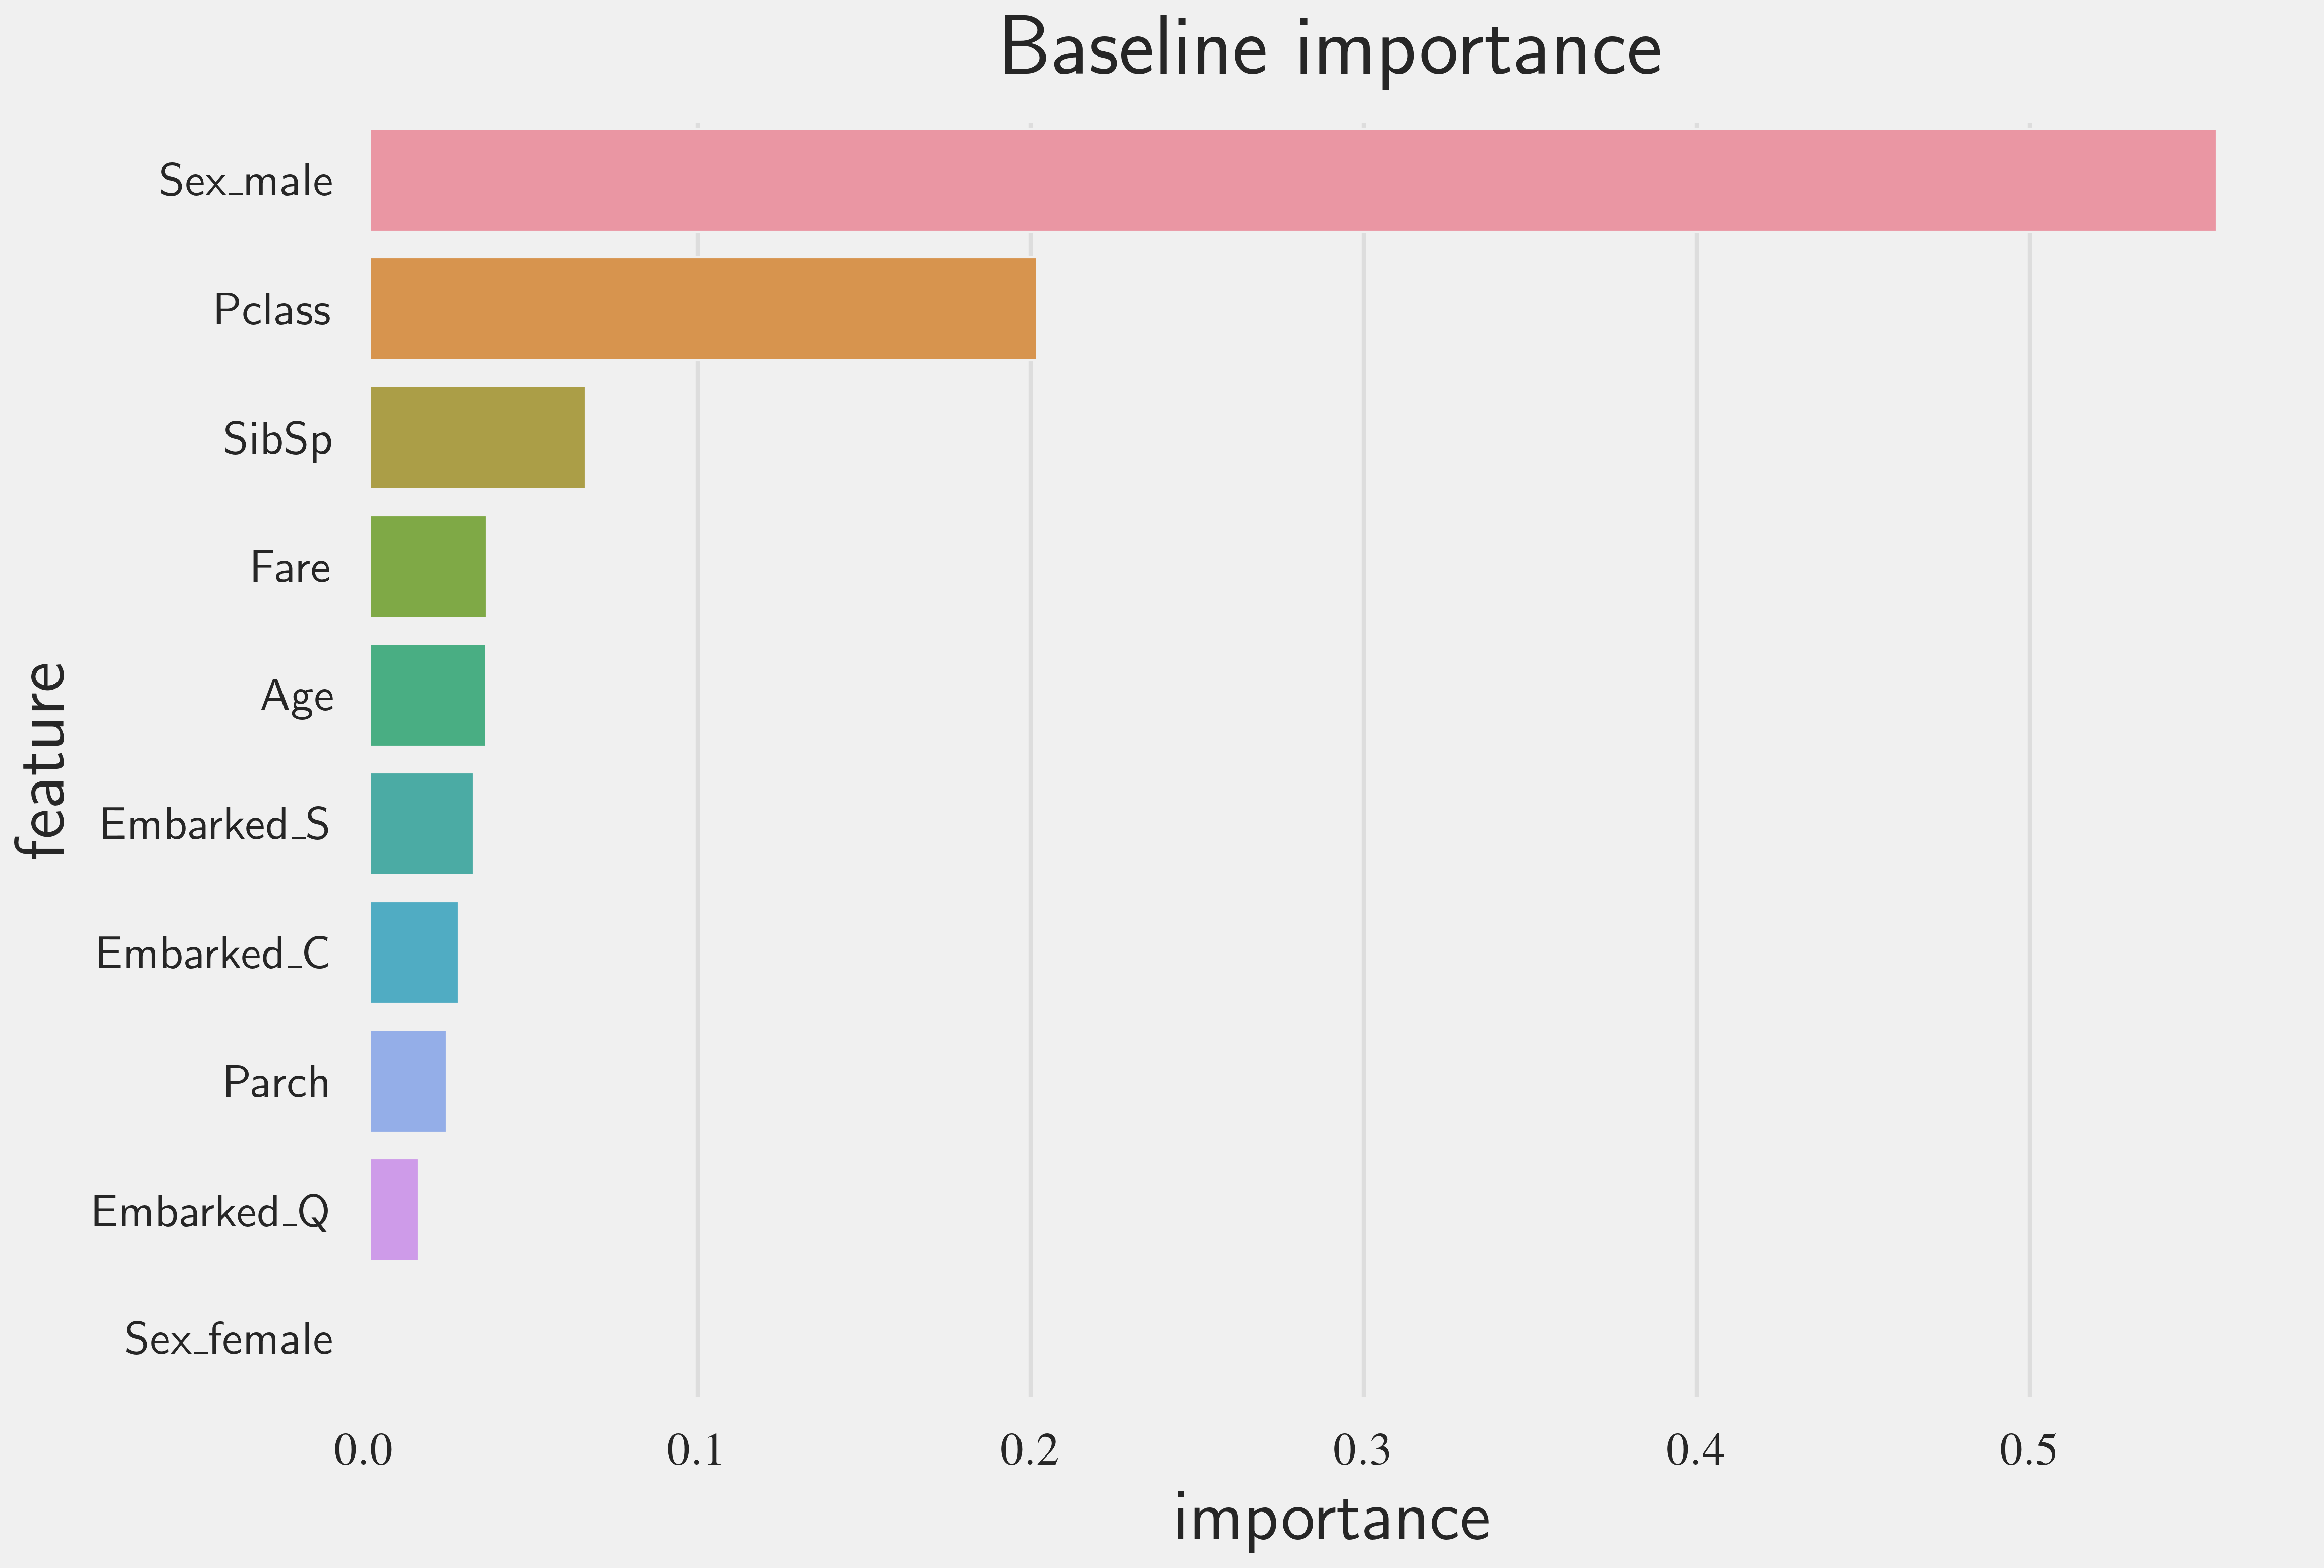

In [12]:
order = list(feature_importances.groupby("feature").mean().sort_values("importance", ascending=False).index)

%matplotlib inline
plt.figure()
sns.barplot(x="importance", y="feature", data=feature_importances, order=order)
plt.title('Baseline importance')
# plt.tight_layout()
plt.show()

### Ensembling with Blending and Stacking Solutions

In [13]:
# Splitting dataset into a training and a test set
from sklearn.model_selection import train_test_split
from Config import SETTINGS

X_train, X_val, y_train, y_val = train_test_split(
    X, y,   test_size=SETTINGS['TEST_SIZE'], random_state=SETTINGS['RANDOM_STATE'])

print(f'Trained on {X_train.shape[0]} samples, validated on {X_val.shape[0]} samples.')

Trained on 596 samples, validated on 295 samples.


In [14]:
# Prepare models to ensemble
from Utils.utils import get_base_model_list
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate models with default hyper-parameters and Train each model on the training set
base_estimators = [
    SVC(probability=True, random_state=SETTINGS['RANDOM_STATE']).fit(
        X_train, y_train),
    RandomForestClassifier(
        random_state=SETTINGS['RANDOM_STATE']).fit(X_train, y_train),
    AdaBoostClassifier(random_state=SETTINGS['RANDOM_STATE']).fit(
        X_train, y_train),
    XGBClassifier(random_state=SETTINGS['RANDOM_STATE']).fit(X_train, y_train),
    KNeighborsClassifier().fit(X_train, y_train),
]

base_estimators = get_base_model_list(base_estimators)

base_estimators


[('SVC', SVC(probability=True, random_state=42)),
 ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
 ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
 ('XGBClassifier',
  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='',
                learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                missing=nan, monotone_constraints='()', n_estimators=100,
                n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
                reg_alpha=0, reg_lambda=1, ...)),
 ('KNeighborsClassifier', KNeighborsClassifier())]

#### Majority voting

For each prediction, you take the class most frequently predicted by your models.

In [15]:
import numpy as np
from scipy.stats import mode
# Predict on the test set
preds = np.stack([base_estimator[1].predict(X_val) for base_estimator in base_estimators]).T
# Ensemble all these predictions using majority voting
max_voting = np.apply_along_axis(mode, 1, preds)[:, 0]


In [16]:
# Check the accuracy for each single model
for i, model in enumerate(base_estimator[0] for base_estimator in base_estimators):
    print(
        f"Accuracy for model {model} is: {accuracy_score(y_true=y_val, y_pred=preds[:, i]):0.3f}")


Accuracy for model SVC is: 0.837
Accuracy for model RandomForestClassifier is: 0.797
Accuracy for model AdaBoostClassifier is: 0.810
Accuracy for model XGBClassifier is: 0.797
Accuracy for model KNeighborsClassifier is: 0.820


In [17]:
# Check the majority voting ensemble
print(f"Accuracy for Majority Voting is: {accuracy_score(y_true=y_val, y_pred=max_voting):0.3f}")


Accuracy for Majority Voting is: 0.831


In [18]:
# Majority/Hard voting implemented by sklearn
from sklearn.ensemble import VotingClassifier

model_ensemble_voting = VotingClassifier(estimators=base_estimators, voting='hard').fit(X_train, y_train)

print(
    f"Accuracy for Voting Classifier in sklearn library is: {model_ensemble_voting.score(X_val, y_val):0.3f}")


Accuracy for Voting Classifier in sklearn library is: 0.831


#### Averaging of model predictions

When averaging your predictions from different models in a competition, you can consider all your predictions as having potentially the same predictive power and use the arithmetic mean to derive an average value.

In [19]:
proba = np.stack([base_estimator[1].predict_proba(X_val)[:, 1]
                 for base_estimator in base_estimators]).T
for i, model in enumerate(base_estimator[0] for base_estimator in base_estimators):
    ras = roc_auc_score(y_true=y_val, y_score=proba[:, i])
    print(f"ROC-AUC for model {model} is: {ras:0.5f}")


ROC-AUC for model SVC is: 0.87700
ROC-AUC for model RandomForestClassifier is: 0.87569
ROC-AUC for model AdaBoostClassifier is: 0.85952
ROC-AUC for model XGBClassifier is: 0.84662
ROC-AUC for model KNeighborsClassifier is: 0.87836


In [20]:
# Try to figure out what kind of mean works best when switching to ROC-AUC as our evaluation metric.

print(
    f"Mean averaging ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=proba.mean(axis=1)):0.5f}")

print(
    f"Geometric averaging ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=proba.prod(axis=1)**(1/3)):0.5f}")

print(
    f"Harmonic averaging ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=1 / np.mean(1. / (proba + 1e-6), axis=1)):0.5f}")

print(
    f"Mean of powers averaging ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=np.mean(proba**3, axis=1)**(1/3)):0.5f}")

print(
    f"Logarithmic averaging ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=np.expm1(np.mean(np.log1p(proba), axis=1))):0.5f}")


Mean averaging ROC-AUC is: 0.88738
Geometric averaging ROC-AUC is: 0.88481
Harmonic averaging ROC-AUC is: 0.88367
Mean of powers averaging ROC-AUC is: 0.88348
Logarithmic averaging ROC-AUC is: 0.88724


##### Weighted averages

We will first create a correlation matrix of our predicted probabilities, and then we proceed by:

1. Removing the one values on the diagonal and replacing them with zeroes
2. Averaging the correlation matrix by row to obtain a vector
3.  Taking the reciprocal of each row sum
4.  Normalizing their sum to 1.0
5.  Using the resulting weighting vector in a matrix multiplication of our predicted probabilities

In [21]:
cormat = np.corrcoef(proba.T)
np.fill_diagonal(cormat, 0e1)
W = 1 / np.mean(cormat, axis=1)
W = W / sum(W) # normalizing to sum==1.0
weighted = proba.dot(W)
ras = roc_auc_score(y_true=y_val, y_score=weighted)
print(f"Weighted averaging ROC-AUC is: {ras:0.5f}")

Weighted averaging ROC-AUC is: 0.88771


##### Averaging in your cross-validation strategy

You may also test at training time by running the averaging operations on the validation fold (the fold that you are not using for training your model).

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=SETTINGS['K-FOLDS'], shuffle=True,
           random_state=SETTINGS['RANDOM_STATE'])
scores = []
for k, (train_index, test_index) in enumerate(kf.split(X)):
    for model in base_estimators:
        model[1].fit(X.iloc[train_index, :], y[train_index])

    proba = np.stack([base_estimator[1].predict_proba(X.iloc[test_index, :])[
                     :, 1] for base_estimator in base_estimators]).T

    ras = roc_auc_score(y_true=y[test_index],
                        y_score=proba.mean(axis=1))
    scores.append(ras)
    print(f"FOLD-{k} Mean averaging ROC-AUC is: {ras:0.5f}")

print(f"CV Mean averaging ROC-AUC is: {np.mean(scores):0.5f}")


FOLD-0 Mean averaging ROC-AUC is: 0.89395
FOLD-1 Mean averaging ROC-AUC is: 0.85330
FOLD-2 Mean averaging ROC-AUC is: 0.89795
FOLD-3 Mean averaging ROC-AUC is: 0.82576
FOLD-4 Mean averaging ROC-AUC is: 0.85623
CV Mean averaging ROC-AUC is: 0.86544


##### Correcting averaging for ROC-AUC evaluations
Using a min-max scaler approach, you simply convert each model’s estimates into the range 0-1 and then proceed with averaging the predictions.

In [23]:
from sklearn.preprocessing import MinMaxScaler

for model in base_estimators:
        model[1].fit(X_train, y_train)

proba = np.stack([base_estimator[1].predict_proba(X_val)[:, 1]
                 for base_estimator in base_estimators]).T

print(
    f"Mean averaging ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=MinMaxScaler().fit_transform(proba).mean(axis=1)):0.5f}")


Mean averaging ROC-AUC is: 0.88929


#### Stacking models together

In stacking, you always have a meta-learner. This time, however, it is not trained on a holdout, but on the entire training set, thanks to the out-of-fold (OOF) prediction strategy.

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

model_ensemble_stacking = StackingClassifier(
    estimators=base_estimators, final_estimator=LogisticRegression()
).fit(X_train, y_train)

print(
    f"Stacking ROC-AUC is: {roc_auc_score(y_true=y_val, y_score=model_ensemble_stacking.predict_proba(X_val)[:, 1]):0.5f}")


Stacking ROC-AUC is: 0.88995


## Bayesian Hyperparameter Optimization

In [ ]:
# Importing core libraries
import joblib
from functools import partial

# Classifiers
from xgboost import XGBClassifier

# Model selection
from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer


In [ ]:
# Setting the scoring function
scoring = make_scorer(roc_auc_score, greater_is_better=True)
# Setting the cross-validation strategy
kf = KFold(n_splits=SETTINGS['K-FOLDS'], shuffle=True,
           random_state=SETTINGS['RANDOM_STATE'])
# Setting the basic model
estimator_to_tune = XGBClassifier()


In [ ]:
# Setting the search space
search_spaces = {
    # Boosting learning rate
    'learning_rate': Real(1e-2, 1e0, 'log-uniform'),
    # Number of boosted trees to fit
    'n_estimators': Integer(10, 5000),
    # Maximum tree depth for base learners
    'max_depth': Integer(1, 50),
    # Maximum delta step we allow for each leaf output
    'max_delta_step': Integer(0, 20),
    # Subsample ratio of the training instance
    'subsample': Real(1e-1, 1e0, 'uniform'),
	# Subsample ratio of columns by tree
    'colsample_bytree': Real(1e-2, 1e0, 'uniform'),
    # Subsample ratio by level in trees
    'colsample_bylevel': Real(1e-2, 1e0, 'uniform'),
    # L2 regularization
    'reg_lambda': Real(1e-9, 1e2, 'log-uniform'),
    # L1 regularization
    'reg_alpha': Real(1e-9, 1e2, 'log-uniform'),
    # Minimum loss reduction for tree partitioning
    'gamma': Real(1e-9, 1e2, 'log-uniform'),
    # Weight for the positive class
    'scale_pos_weight': Real(1e-6, 5e2, 'log-uniform'),
}


In [ ]:
# Wrapping everything up into the Bayesian optimizer
opt = BayesSearchCV(estimator=estimator_to_tune,
                    search_spaces=search_spaces,
                    scoring=scoring,
                    cv=kf,
                    n_iter=60,           # max number of trials
                    n_jobs=-1,           # number of jobs
                    iid=False,
                    # if not iid it optimizes on the cv score
                    return_train_score=False,
                    refit=False,
                    # Gaussian Processes (GP)
                    optimizer_kwargs={'base_estimator': 'GP'},
                    # random state for replicability
                    random_state=SETTINGS['RANDOM_STATE'])


In [ ]:
from Utils.utils import report_perf
# Running the optimizer
overdone_control = DeltaYStopper(delta=1e-4)
# We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60 * 60 * 6)
# We impose a time limit (6 hours)
best_params = report_perf(opt, X, y, 'Baseline', callbacks=[overdone_control, time_limit_control])


## Trick

### Pseudo-labeling

The idea is to add examples from the test set whose predictions you are confident about to your training set.

1. Train your model
2. Predict on the test set
3. Establish a confidence measure
4. Select the test set elements to add
5. Build a new model with the combined data
6. Predict using this model and submit

In [ ]:
from Utils.pseudo_labeling import PseudoLabeling
from sklearn.metrics import accuracy_score

# Pseudo labeling using fine-tuned model
pseudo_labeller = PseudoLabeling(
    model=XGBClassifier(**best_params), unlabelled_data=X_test.values, sample_rate=3e-1, random_state=SETTINGS['RANDOM_STATE'], verbose=True)
pseudo_labeller.fit(X_train.values, y_train.values)

print(f"Accuracy using Pseudo Labeling : {accuracy_score(pseudo_labeller.predict(X_val.values), y_val.values):.5f}")


### Denoising with autoencoders


## Post-processing


## Submission


In [ ]:
predictions = pseudo_labeller.predict(X_test)
output = pd.DataFrame(
    {'PassengerId': test_df['PassengerId'], 'Survived': predictions})

output.to_csv(Path(SETTINGS['ROOT_PATH']) / SETTINGS['SUBMISSION_PATH'], index=False)

print("Your submission was successfully saved!")
